In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [2]:
bank_data = pd.read_csv("P:/DS material/DS Assignments/Solved and unsolved assignments/All DS Assignments/All Datasets for assignments/bank-full (1).csv", sep = ';')
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank_data.shape

(45211, 17)

In [5]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
bank_data.isna()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
bank_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
# One-Hot Encoding of categrical variables
data1=pd.get_dummies(bank_data,columns=['job','marital','education','contact','poutcome','month'])
data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,no,29,yes,no,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,no,2,yes,yes,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,no,1506,yes,no,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,no,1,no,no,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,no,1729,no,no,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,no,5715,no,no,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,no,668,no,no,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
# To see all columns
pd.set_option("display.max.columns", None)
data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,44,no,29,yes,no,5,151,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33,no,2,yes,yes,5,76,1,-1,0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,47,no,1506,yes,no,5,92,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,33,no,1,no,no,5,198,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,yes,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45207,71,no,1729,no,no,17,456,2,-1,0,yes,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45208,72,no,5715,no,no,17,1127,5,184,3,yes,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
45209,57,no,668,no,no,17,508,4,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  object
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  object
 4   loan                 45211 non-null  object
 5   day                  45211 non-null  int64 
 6   duration             45211 non-null  int64 
 7   campaign             45211 non-null  int64 
 8   pdays                45211 non-null  int64 
 9   previous             45211 non-null  int64 
 10  y                    45211 non-null  object
 11  job_admin.           45211 non-null  uint8 
 12  job_blue-collar      45211 non-null  uint8 
 13  job_entrepreneur     45211 non-null  uint8 
 14  job_housemaid        45211 non-null  uint8 
 15  job_management       45211 non-null  uint8 
 16  job_

In [10]:
# Custom Binary Encoding of Binary o/p variables 
data1['default'] = np.where(data1['default'].str.contains("yes"), 1, 0)
data1['housing'] = np.where(data1['housing'].str.contains("yes"), 1, 0)
data1['loan'] = np.where(data1['loan'].str.contains("yes"), 1, 0)
data1['y'] = np.where(data1['y'].str.contains("yes"), 1, 0)
data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int64
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

## Model Building

In [11]:
# Dividing our data into input and output variables
x = pd.concat([data1.iloc[:,0:10],data1.iloc[:,11:]],axis=1)  #all independent features
y = data1.iloc[:,10]    #target variable

In [12]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
classifier.coef_

array([[-2.02917627e-02, -1.62990794e-02,  8.71974414e-06,
        -5.98770017e-01, -1.70668149e-01, -1.06660651e-02,
         3.91748850e-03, -4.57025485e-01,  1.50518712e-03,
        -1.50647021e-02, -2.46389724e-02, -2.27675300e-01,
        -2.36038959e-02, -7.26606894e-03,  7.03725876e-03,
         1.47389759e-01, -1.38815361e-02, -7.97889642e-02,
         2.57493477e-02, -6.27275686e-02,  2.85057341e-03,
         2.24910389e-03,  1.55116636e-02, -1.54013539e-01,
        -1.15804389e-01, -6.12675438e-02, -2.47324199e-01,
         4.20835256e-02,  1.22019535e-02,  8.23440887e-02,
         4.43789558e-02, -3.81029309e-01, -1.16399590e-01,
        -2.63127125e-02,  2.74913657e-01, -3.86507618e-01,
         3.71120406e-02,  1.97966990e-02,  2.52556539e-02,
        -1.30328170e-02, -9.56606599e-03, -7.30748286e-02,
        -5.08145546e-02,  7.58299231e-02, -3.73053471e-01,
        -4.58601243e-02,  8.73567966e-02,  6.57444843e-02]])

In [14]:
classifier.intercept_

array([-0.25432625])

### Model Prediction

In [15]:
# Predict for x dataset
y_pred = classifier.predict(x)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [16]:
classifier.predict_proba(x)

array([[0.93969905, 0.06030095],
       [0.96203725, 0.03796275],
       [0.96991084, 0.03008916],
       ...,
       [0.3607134 , 0.6392866 ],
       [0.92004656, 0.07995344],
       [0.7226977 , 0.2773023 ]])

In [17]:
classifier.predict_proba(x)[:,1]

array([0.06030095, 0.03796275, 0.03008916, ..., 0.6392866 , 0.07995344,
       0.2773023 ])

In [18]:
y_pred_df = pd.DataFrame({'Actual': y,
                         'Prob': classifier.predict_proba(x)[:,1],
                         'Predicted': classifier.predict(x)})

In [19]:
y_pred_df

,Actual,Prob,Predicted
0,0,0.060301,0
1,0,0.037963,0
2,0,0.030089,0
3,0,0.030614,0
4,0,0.129872,0
...,...,...,...
45206,1,0.614623,1
45207,1,0.224635,0
45208,1,0.639287,1
45209,0,0.079953,0


In [20]:
y_pred_df['Correct'] = y_pred_df['Actual'] == y_pred_df['Predicted']
y_pred_df

,Actual,Prob,Predicted,Correct
0,0,0.060301,0,True
1,0,0.037963,0,True
2,0,0.030089,0,True
3,0,0.030614,0,True
4,0,0.129872,0,True
...,...,...,...,...
45206,1,0.614623,1,True
45207,1,0.224635,0,False
45208,1,0.639287,1,True
45209,0,0.079953,0,True


In [21]:
y_pred_df[y_pred_df['Correct']==True]

,Actual,Prob,Predicted,Correct
0,0,0.060301,0,True
1,0,0.037963,0,True
2,0,0.030089,0,True
3,0,0.030614,0,True
4,0,0.129872,0,True
...,...,...,...,...
45200,1,0.840497,1,True
45206,1,0.614623,1,True
45208,1,0.639287,1,True
45209,0,0.079953,0,True


In [22]:
y_pred_df[y_pred_df['Correct']==False]

,Actual,Prob,Predicted,Correct
37,0,0.956069,1,False
43,0,0.880193,1,False
59,0,0.962051,1,False
83,1,0.493429,0,False
129,1,0.140287,0,False
...,...,...,...,...
45202,1,0.191620,0,False
45203,1,0.328308,0,False
45204,1,0.172495,0,False
45205,1,0.216108,0,False


In [23]:
y_pred_df['Correct'].value_counts()

True     40322
False     4889
Name: Correct, dtype: int64

In [24]:
y_pred_df['Correct'].mean()

0.8918625998097808

### Confusion Matrix

In [25]:
# Confusion Matrix for the model accuracy
confusion_matrix = confusion_matrix(y,y_pred)

print (confusion_matrix)

[[39033   889]
 [ 4000  1289]]


<AxesSubplot:>

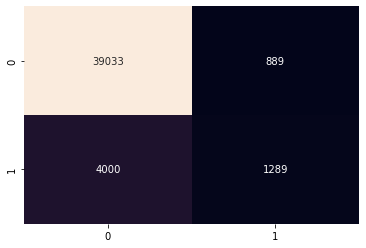

In [26]:
sns.heatmap(confusion_matrix, annot = True, fmt = 'd', cbar = False)

In [27]:
# The model accuracy is calculated by (a+d)/(a+b+c+d)
(39156+1162)/(39156+766+4127+1162)

0.8917741257658535

In [28]:
#Sensitivity/ Recall/ True Positive Rate
39156/(39156+766)*100

98.08125845398527

In [29]:
#Specificity/ True Negative Rate
1160/(1160+4129)*100

21.93231234637928

In [30]:
#Precision
39156/(39156+4129)*100

90.46089869469793

In [31]:
#F1 Score
(2*0.9046*0.9808)/(0.9046+0.9808)*100

94.1160156995863

In [32]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     39922
           1       0.59      0.24      0.35      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.61      0.64     45211
weighted avg       0.87      0.89      0.87     45211



### ROC Curve

In [33]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [34]:
classifier.predict_proba(x)

array([[0.93969905, 0.06030095],
       [0.96203725, 0.03796275],
       [0.96991084, 0.03008916],
       ...,
       [0.3607134 , 0.6392866 ],
       [0.92004656, 0.07995344],
       [0.7226977 , 0.2773023 ]])

In [35]:
fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba(x)[:,1])

In [36]:
fpr

array([0.00000000e+00, 2.50488452e-05, 5.00976905e-05, ...,
       9.98096288e-01, 9.98096288e-01, 1.00000000e+00])

In [37]:
tpr

array([0.        , 0.        , 0.        , ..., 0.99981093, 1.        ,
       1.        ])

In [38]:
thresholds

array([1.99999990e+00, 9.99999903e-01, 9.99991963e-01, ...,
       1.94910821e-07, 1.89445050e-07, 2.14368436e-14])

In [39]:
pd.DataFrame({'False Positive Rate': fpr, 
             'True Positive Rate': tpr,
             'Thresholds': thresholds})

,False Positive Rate,True Positive Rate,Thresholds
0,0.000000,0.000000,2.000000e+00
1,0.000025,0.000000,9.999999e-01
2,0.000050,0.000000,9.999920e-01
3,0.000050,0.000189,9.999846e-01
4,0.000125,0.000189,9.999700e-01
...,...,...,...
7084,0.994940,0.999622,5.191737e-06
7085,0.994940,0.999811,5.148465e-06
7086,0.998096,0.999811,1.949108e-07
7087,0.998096,1.000000,1.894450e-07


In [40]:
auc = roc_auc_score(y, y_pred)
auc

0.6107224719702758

Text(0.5, 1.0, 'logit model (area = 0.61)')

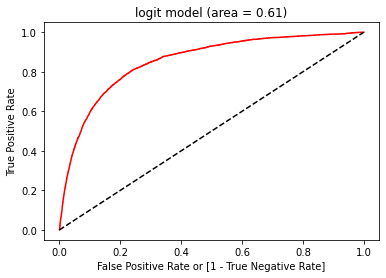

In [41]:
plt.plot(fpr, tpr, color='red')   #label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('logit model (area = %0.2f)'%auc)

In [42]:
np.random.rand()

0.4355771784903494

In [43]:
np.random.rand()*0.01

0.0011178279696976968

In [44]:
0.505 - np.random.rand()*0.01

0.49780767810758136

In [45]:
probas = [0.505 - np.random.rand()*0.01 for _ in y]
probas

[0.500959546669376,
 0.5039644382274474,
 0.49785034506207154,
 0.500363020675335,
 0.504775840169126,
 0.4954273122404229,
 0.4990027504977229,
 0.5040240170707264,
 0.5039794118123906,
 0.501995497108797,
 0.5003714726226415,
 0.5002528070075141,
 0.49860356998361277,
 0.5043738146989248,
 0.4979164704543244,
 0.5017261622942658,
 0.49740155001852515,
 0.5020145540044807,
 0.4992240543947808,
 0.5029592087560447,
 0.501266114927548,
 0.4986359501221574,
 0.5012638865700516,
 0.49557213847542136,
 0.501720437913384,
 0.5047322707558791,
 0.5020527663645351,
 0.5014818340847302,
 0.5019057052571476,
 0.5016429563677554,
 0.49746343998226683,
 0.5023365363037089,
 0.49976937555621015,
 0.5012307483509035,
 0.5022693934024698,
 0.4984907736870046,
 0.4984602716016611,
 0.49683178442404985,
 0.49645527681520163,
 0.5015498022443842,
 0.5039220023562853,
 0.5043622066077418,
 0.4975255954355601,
 0.5043183588063249,
 0.49618886537810736,
 0.4999535748661173,
 0.49741656096537906,
 0.500997

In [46]:
probas = [0.51 - np.random.rand()*0.01 if _y else 0.49 + np.random.rand()*0.01 for _y in y]
probas

[0.49449258903941984,
 0.4905892554749206,
 0.4991513096266331,
 0.4907781136329713,
 0.4987724801032307,
 0.4951374856026143,
 0.4993249313293169,
 0.49526917373935847,
 0.49170908291796095,
 0.49261785959788,
 0.4932241033443112,
 0.4978131176444322,
 0.4919248764008984,
 0.4997604311991009,
 0.4904487995102885,
 0.4949122228985655,
 0.49780212756668507,
 0.49880805390784155,
 0.4942856645636521,
 0.4954141599602759,
 0.49694685594901844,
 0.49083560559903927,
 0.49513992046494165,
 0.4957946706019233,
 0.4900655748914474,
 0.49205976504151255,
 0.4997881634518199,
 0.4987898292356899,
 0.49059448939513556,
 0.4944655177331203,
 0.4975794522049367,
 0.4953631264372582,
 0.4967482236975637,
 0.4911531352779621,
 0.49465958806295435,
 0.4977733381671111,
 0.49682858426026094,
 0.4998694473264854,
 0.4917008857953014,
 0.4998988758565149,
 0.4981308215915935,
 0.49531373490012326,
 0.49268023313058534,
 0.49480464523085016,
 0.4984962593099078,
 0.4978375766900053,
 0.494438354849991,
 

In [47]:
acc = np.array([(_y > 0.5) == _y for _y in y])
acc

array([ True,  True,  True, ...,  True,  True,  True])

In [48]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [49]:
acc.mean()

1.0

In [50]:
fpr, tpr, thresholds = roc_curve(y, probas)
fpr, tpr, thresholds

(array([0., 0., 0., 1.]),
 array([0.00000000e+00, 1.89071658e-04, 1.00000000e+00, 1.00000000e+00]),
 array([1.50999979, 0.50999979, 0.50000238, 0.49000001]))

In [51]:
fpr

array([0., 0., 0., 1.])

In [52]:
tpr

array([0.00000000e+00, 1.89071658e-04, 1.00000000e+00, 1.00000000e+00])

In [53]:
thresholds

array([1.50999979, 0.50999979, 0.50000238, 0.49000001])

In [54]:
pd.DataFrame({'False Positive Rate': fpr, 
             'True Positive Rate': tpr,
             'Thresholds': thresholds})

,False Positive Rate,True Positive Rate,Thresholds
0,0.0,0.000000,1.510000
1,0.0,0.000189,0.510000
2,0.0,1.000000,0.500002
3,1.0,1.000000,0.490000


In [55]:
auc = roc_auc_score(y, probas)
auc

1.0

Text(0.5, 1.0, 'logit model (area = 1.00)')

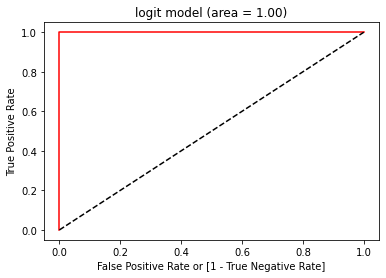

In [56]:
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('logit model (area = %0.2f)'%auc)

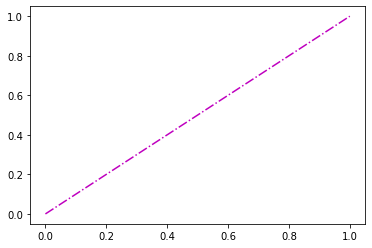

In [57]:
plt.plot([0, 1], [0, 1], 'm-.')